<a href="https://colab.research.google.com/github/Kaine-UCF/Artificial-Intelligence/blob/master/HW2/A_I2BFinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNDERFIT MODEL

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 156us/sample - loss: 2.2291 - acc: 0.1475 - val_loss: 1.9045 - val_acc: 0.3001
Epoch 2/5
60000/60000 [==============================] - 8s 139us/sample - loss: 1.9434 - acc: 0.2087 - val_loss: 1.6894 - val_acc: 0.3495
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 1.8115 - acc: 0.2366 - val_loss: 1.6508 - val_acc: 0.3610
Epoch 4/5
60000/60000 [==============================] - 8s 139us/sample - loss: 1.7791 - acc: 0.2507 - val_loss: 1.5866 - val_acc: 0.4106
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 1.6053 - acc: 0.3331
Test accuracy: 0.3331


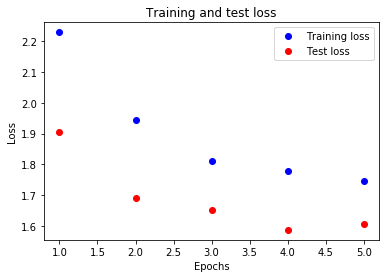

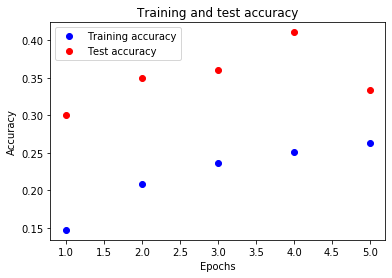

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

'''
This model applies dropout to many times, which causes an excessive anount of nodes to be removed.
This results in a significant decrease in accuracy due to under fitting.
'''
underfitModel = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
underfitModel.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = underfitModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = underfitModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

OVERFIT MODEL

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4827 - acc: 0.8261 - val_loss: 0.4370 - val_acc: 0.8462
Epoch 2/50
60000/60000 [==============================] - 13s 218us/sample - loss: 0.3611 - acc: 0.8683 - val_loss: 0.3615 - val_acc: 0.8681
Epoch 3/50
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3211 - acc: 0.8828 - val_loss: 0.3469 - val_acc: 0.8740
Epoch 4/50
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2940 - acc: 0.8916 - val_loss: 0.3542 - val_acc: 0.8725
Epoch 5/50
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2797 - acc: 0.8959 - val_loss: 0.3417 - val_acc: 0.8786
Epoch 6/50
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2646 - acc: 0.9014 - val_loss: 0.3470 - val_acc: 0.8765
Epoch 7/50
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2507 - acc: 0.9063 

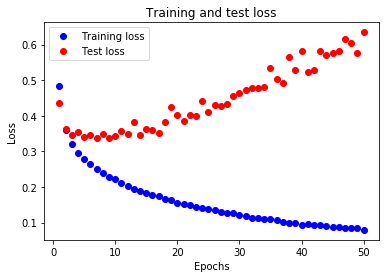

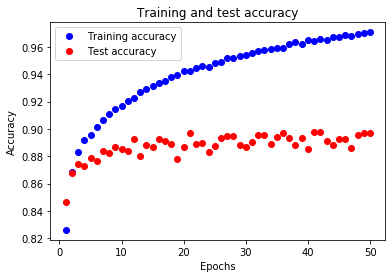

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

'''
This model has way to many nuerons within its dense layer, and runs for to many epochs.
This results in the model overfiting, which increases the run time and decreases its ability to make an accurate
classification on new data (discrepancy between testing/traning accuracy ~6.5%)
'''

overfitModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10000, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
overfitModel.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 50
history = overfitModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = overfitModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

GOOD MODEL

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.6282 - acc: 0.7748 - val_loss: 0.4500 - val_acc: 0.8363
Epoch 2/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4524 - acc: 0.8399 - val_loss: 0.4133 - val_acc: 0.8504
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4149 - acc: 0.8503 - val_loss: 0.3906 - val_acc: 0.8596
Epoch 4/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3931 - acc: 0.8572 - val_loss: 0.3908 - val_acc: 0.8582
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 0.3752 - acc: 0.8643
Test accuracy: 0.8643


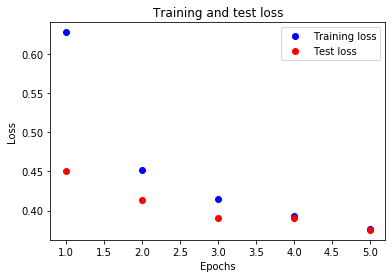

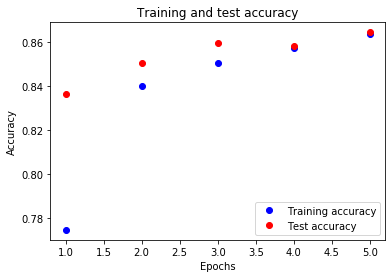

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
'''
This model is pretty good. 
The has an accuracy of ~87% after only 5 epochs, and the discrepancy between testing/traning accuracy is very low (~0.1%).
Dropout is applied to fight overfitting, and additional layers are added to increase accuracy. 
'''
goodModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
goodModel.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = goodModel.fit(train_images, 
                    train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))
test_loss, test_acc = goodModel.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()